In [1]:
import os
import tensorflow as tf
import sys

from dataset import Dataset
import cervix_data
import image_processing
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
FLAGS = tf.app.flags.FLAGS
FLAGS.data_dir = '/home/jt2/Workspace/cervix/'
FLAGS.train_dir= '/home/jt2/Workspace/cervix/train'
FLAGS.batch_size = 5
FLAGS.num_readers = 4
FLAGS.num_preprocess_threads = 4
FLAGS.input_queue_memory_factor = 2
FLAGS.image_size = 299

In [3]:
c = cervix_data.CervixData('train')
c.data_files()
tfrecords_filename = c.data_files()[0]
IMAGE_HEIGHT = 299
IMAGE_WIDTH = 299

(299, 299, 3)
[[[ 0.30980393  0.25882354  0.32549021]
  [ 0.30905634  0.25807595  0.32474262]
  [ 0.29361928  0.24363567  0.30980393]
  ..., 
  [ 0.26759729  0.30756071  0.34061161]
  [ 0.26081496  0.31963849  0.34708947]
  [ 0.25907248  0.32966071  0.34534699]]

 [[ 0.29411766  0.25098041  0.3137255 ]
  [ 0.30296317  0.2480612   0.31472787]
  [ 0.30391437  0.25978035  0.32302383]
  ..., 
  [ 0.24948493  0.28795287  0.32175151]
  [ 0.22801204  0.29368299  0.32113397]
  [ 0.24787146  0.30644608  0.31880036]]

 [[ 0.28956655  0.24642928  0.30917439]
  [ 0.31259757  0.26161718  0.32828385]
  [ 0.30188078  0.25874352  0.32148862]
  ..., 
  [ 0.23712415  0.28175688  0.30678177]
  [ 0.24371505  0.28293073  0.31822485]
  [ 0.25301331  0.29615057  0.31233469]]

 ..., 
 [[ 0.58039218  0.75686282  0.90980399]
  [ 0.58970124  0.75440711  0.91722506]
  [ 0.59643841  0.74396282  0.88873523]
  ..., 
  [ 0.47855398  0.37274531  0.45768806]
  [ 0.47323951  0.36343557  0.4497101 ]
  [ 0.47602087  0.371

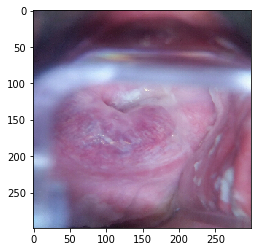

In [7]:
# filename_queue = tf.train.string_input_producer(
#     [tfrecords_filename], num_epochs=10)

# Even when reading in multiple threads, share the filename
# queue.
# image = read_and_decode(filename_queue)
# image, labels = image_processing.inputs(c)
# image, labels = image_processing.inputs(c)
image = image_processing.inputs(c)

# The op for initializing the variables.
init_op = tf.group(tf.global_variables_initializer(),
                   tf.local_variables_initializer())

out = 1
with tf.Session()  as sess:
    
    sess.run(init_op)
    
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    
    # Let's read off 3 batches just for example
    for i in xrange(1):
    
#         img, lbl = sess.run([image, labels])
        img = sess.run(image)
#         print(img[0, :, :, :].shape)
        print(img.shape)
        print img
        out = img
        
        print('current batch')
        
        # We selected the batch size of two
        # So we should get two image pairs in each batch
        # Let's make sure it is random

#         plt.imshow(img[0, :, :, :])
#         plt.show()
#         plt.imshow(anno[0, :, :, 0])
#         plt.show()
#         plt.imshow(img[1, :, :, :])
#         plt.show()
#         plt.imshow(anno[1, :, :, 0])
#         plt.show()
#         print lbl[0]
#         plt.imshow(img[0,:,:,:])
        plt.imshow(img)
        plt.show()
#         print lbl[1]
#         plt.imshow(img[1,:,:,:])
        plt.show()
    
    coord.request_stop()
    coord.join(threads)


In [18]:
print np.max(out)
print np.min(out)
out2 = np.subtract(out,0.5) * 2
print np.max(out2)
print np.min(out2)

0.999672
0.0473719
0.999344
-0.905256


In [5]:
def read_and_decode(filename_queue):
    
    reader = tf.TFRecordReader()

    _, serialized_example = reader.read(filename_queue)

    features = tf.parse_single_example(
      serialized_example,
      # Defaults are not specified since both keys are required.
      features={
        'image/height': tf.FixedLenFeature([], tf.int64),
        'image/width': tf.FixedLenFeature([], tf.int64),
        'image/encoded': tf.FixedLenFeature([], tf.string),
        })
#         'mask_raw': tf.FixedLenFeature([], tf.string)

    # Convert from a scalar string tensor (whose single string has
    # length mnist.IMAGE_PIXELS) to a uint8 tensor with shape
    # [mnist.IMAGE_PIXELS].
#     image = tf.decode_raw(features['image/encoded'], tf.uint8)
#     annotation = tf.decode_raw(features['mask_raw'], tf.uint8)
    image = tf.image.decode_jpeg(features['image/encoded'], channels=3)
    
    height = tf.cast(features['image/height'], tf.int32)
    width = tf.cast(features['image/width'], tf.int32)
    
    image_shape = tf.stack([height, width, 3])
#     annotation_shape = tf.stack([height, width, 1])
    
    image = tf.reshape(image, image_shape)
#     annotation = tf.reshape(annotation, annotation_shape)
    
#     image_size_const = tf.constant((IMAGE_HEIGHT, IMAGE_WIDTH, 3), dtype=tf.int32)
#     annotation_size_const = tf.constant((IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=tf.int32)
    
    # Random transformations can be put here: right before you crop images
    # to predefined size. To get more information look at the stackoverflow
    # question linked above.
    
#     resized_image = tf.image.resize_image_with_crop_or_pad(image=image,
#                                            target_height=IMAGE_HEIGHT,
#                                            target_width=IMAGE_WIDTH)
    
#     resized_annotation = tf.image.resize_image_with_crop_or_pad(image=annotation,
#                                            target_height=IMAGE_HEIGHT,
#                                            target_width=IMAGE_WIDTH)
    
    
#     images, annotations = tf.train.shuffle_batch( [resized_image, resized_annotation],
#     images = tf.train.shuffle_batch([resized_image, resized_image],
#                                     batch_size=2,
#                                     capacity=30,
#                                     num_threads=2,
#                                     min_after_dequeue=10)
    
    return image
#     return resized_image